In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from PIL import Image
import random
import time

In [6]:
PATH = ".\data"

In [7]:
#load the npy file
orientations_test = np.load(PATH + "/orientations_test.npy", allow_pickle=True)
orientations_train = np.load(PATH + "/orientations_train.npy", allow_pickle=True)

In [8]:
orientations_train.shape

(10000,)

In [9]:
train_files = os.listdir(PATH + "/3dshapes_train/")
test_files = os.listdir(PATH+ "/3dshapes_test/")

### Processing the images

In [10]:
train_images = []
for image in train_files:
    img = Image.open(PATH + "/3dshapes_train/"+ image).convert('L') # convert to grayscale 
    img = np.array(img).flatten() # flatten the image to a 1D array in order to be able to use it in the linear regression
    train_images.append(img)
train_data = np.array(train_images)


In [11]:
train_data.shape # must print (10000, 4096) 10000 images with 4096 pixels each

(10000, 4096)

In [12]:
test_images = []
for image in test_files:
    img = Image.open(PATH + "/3dshapes_test/" +image).convert('L') # convert to grayscale 
    img = np.array(img).flatten() # flatten the image to a 1D array in order to be able to use it in the linear regression
    test_images.append(img)
test_data = np.array(test_images)

In [13]:
# Function to plot single image arrays
def plot_single_image(image):
    # Reshape the flattened image to a 2D array
    single_image = np.reshape(image, (64, 64))

    # Plot the image
    plt.imshow(single_image, cmap='gray')
    plt.show()

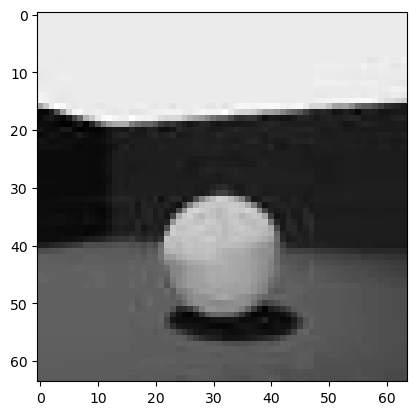

In [14]:
plot_single_image(train_data[0])

### Linear Regression 

In [116]:
#implement linear regression from scratch
def linear_regression(X, y, learning_rate, epochs, experiment = False):
    #keep track of time 
    start = time.time()
    #initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    n = len(X)
    for i in range(epochs):
        y_predicted = np.dot(X, w) + b
        #calculate cost
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        #calculate gradients
        dw = -(2/n) * np.dot(X.T, (y-y_predicted))
        db = -(2/n) * sum(y-y_predicted)
        #update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if not experiment:
            print("epoch: ", i, ",cost: ", cost)
        if cost > 1e6:
            print("cost is too high, exiting training")
            break
    end = time.time()
    print("training time: ", end-start)
    return w, b

In [117]:
w, b = linear_regression(train_data, orientations_train, 0.0001, 100)

epoch:  0 ,cost:  346.2722448979581
epoch:  1 ,cost:  647499.1321459223
epoch:  2 ,cost:  216356884106346.78
cost is too high, exiting training
training time:  0.6939699649810791


Unfortunately, the model did not converge with the raw data. Let's try standardizing and normalizing the data:

In [17]:
def standardize(data):
    # Standardize the data by subtracting the mean and dividing by the standard deviation
    mean = np.mean(data)
    std = np.std(data)
    if np.count_nonzero(std==0) !=0: #check if there is any zero std to avoid divison by zero
        std[std==0] = 1e-8
    return (data - mean) / std
def normalize(data):
    # Normalize the data by subtracting the min and dividing by the max-min
    max = np.max(data)
    min = np.min(data)
    if np.count_nonzero(max-min==0) !=0: #check if there is any zero std to avoid divison by zero
        max-min == 1e-8
    return (data - min) / (max - min)

In [18]:
train_data_standardized = standardize(train_data)

In [19]:
orientations_train_standardized = standardize(orientations_train)

In [118]:
w_s, b_s = linear_regression(train_data_standardized, orientations_train_standardized, 0.0001, 100)

epoch:  0 ,cost:  0.9999999999999392
epoch:  1 ,cost:  0.9999832872259077
epoch:  2 ,cost:  0.9999676237451266
epoch:  3 ,cost:  0.9999527370991761
epoch:  4 ,cost:  0.9999384550722733
epoch:  5 ,cost:  0.9999246568654484
epoch:  6 ,cost:  0.9999112528551761
epoch:  7 ,cost:  0.9998981746941081
epoch:  8 ,cost:  0.9998853695538638
epoch:  9 ,cost:  0.9998727963035936
epoch:  10 ,cost:  0.9998604227670375
epoch:  11 ,cost:  0.999848223673793
epoch:  12 ,cost:  0.9998361790999589
epoch:  13 ,cost:  0.9998242732707943
epoch:  14 ,cost:  0.9998124936369673
epoch:  15 ,cost:  0.9998008301603092
epoch:  16 ,cost:  0.9997892747605406
epoch:  17 ,cost:  0.999777820886092
epoch:  18 ,cost:  0.9997664631809156
epoch:  19 ,cost:  0.9997551972254964
epoch:  20 ,cost:  0.9997440193353694
epoch:  21 ,cost:  0.9997329264041616
epoch:  22 ,cost:  0.9997219157813545
epoch:  23 ,cost:  0.9997109851767658
epoch:  24 ,cost:  0.9997001325861077
epoch:  25 ,cost:  0.9996893562326449
epoch:  26 ,cost:  0.999

The model did converge with the standardized data but also let's try to normalize: 

In [109]:
train_data_normalized = normalize(train_data)
orientations_train_normalized = normalize(orientations_train)

In [119]:
w_n, b_n = linear_regression(train_data_normalized, orientations_train_normalized, 0.0001, 100)

epoch:  0 ,cost:  0.34704387755102584
epoch:  1 ,cost:  0.21847079866655686
epoch:  2 ,cost:  0.15673147926989806
epoch:  3 ,cost:  0.12707600025298468
epoch:  4 ,cost:  0.11282260010007776
epoch:  5 ,cost:  0.10596316809502841
epoch:  6 ,cost:  0.10265339483816859
epoch:  7 ,cost:  0.10104781108229209
epoch:  8 ,cost:  0.10026049432393223
epoch:  9 ,cost:  0.09986615417728066
epoch:  10 ,cost:  0.0996606275316207
epoch:  11 ,cost:  0.09954590383089426
epoch:  12 ,cost:  0.09947493125706236
epoch:  13 ,cost:  0.09942512084132421
epoch:  14 ,cost:  0.09938562706598646
epoch:  15 ,cost:  0.09935124189487754
epoch:  16 ,cost:  0.09931946359174308
epoch:  17 ,cost:  0.09928908960118868
epoch:  18 ,cost:  0.09925954105852902
epoch:  19 ,cost:  0.09923053851937602
epoch:  20 ,cost:  0.09920194629288828
epoch:  21 ,cost:  0.09917369771350064
epoch:  22 ,cost:  0.09914575926731493
epoch:  23 ,cost:  0.09911811337074333
epoch:  24 ,cost:  0.09909075010320072
epoch:  25 ,cost:  0.099063663238200

Both normalizing and standardizing the data:

In [120]:
train_data_ns = standardize(train_data_normalized)
orientations_train_ns = standardize(orientations_train_normalized)

In [125]:
w_ns, b_ns = linear_regression(train_data_ns, orientations_train, 0.0001, 100)

epoch:  0 ,cost:  346.2722448979581
epoch:  1 ,cost:  346.26475268002054
epoch:  2 ,cost:  346.25897895042937
epoch:  3 ,cost:  346.25386879668775
epoch:  4 ,cost:  346.2490591764227
epoch:  5 ,cost:  346.2444173922829
epoch:  6 ,cost:  346.2398892155386
epoch:  7 ,cost:  346.235448488707
epoch:  8 ,cost:  346.23108008499435
epoch:  9 ,cost:  346.22677390783815
epoch:  10 ,cost:  346.2225226014351
epoch:  11 ,cost:  346.21832055156426
epoch:  12 ,cost:  346.2141633668185
epoch:  13 ,cost:  346.2100475615553
epoch:  14 ,cost:  346.20597033886486
epoch:  15 ,cost:  346.2019294323327
epoch:  16 ,cost:  346.1979229869934
epoch:  17 ,cost:  346.19394946839543
epoch:  18 ,cost:  346.19000759266237
epoch:  19 ,cost:  346.1860962724708
epoch:  20 ,cost:  346.1822145752067
epoch:  21 ,cost:  346.1783616905029
epoch:  22 ,cost:  346.17453690499696
epoch:  23 ,cost:  346.17073958266906
epoch:  24 ,cost:  346.1669691495285
epoch:  25 ,cost:  346.1632250816064
epoch:  26 ,cost:  346.15950689559804


Processing the test data the same way we processed the train data: 

In [122]:
test_data_standardized = standardize(test_data)
test_data_normalized = normalize(test_data)
test_data_ns = standardize(test_data_normalized)
orientations_test_standardized = standardize(orientations_test)
orientations_test_normalized = normalize(orientations_test)
orientations_test_ns = standardize(orientations_test_normalized)

In [65]:
def predict(X, w, b):
    #keep track of prediction time
    start = time.time()
    y_predicted = np.dot(X, w) + b
    end = time.time()
    print("prediction time: ", end-start)
    return y_predicted

In [158]:
def test(X, y, w, b):
    y_predicted = predict(X, w, b)
    #print the root mean squared error
    rmse = np.sqrt(np.mean((y-y_predicted)**2))
    print("RMSE: ", rmse)
    return rmse

Testing the model on raw, standardized, normalized and standardized normalized data:

In [146]:
test(test_data, orientations_test, w, b)

prediction time:  0.003904104232788086
RMSE:  269556034423.19086


269556034423.19086

RMSE for the standardized data:

In [147]:
test(test_data_standardized, orientations_test_standardized, w_s, b_s)

prediction time:  0.0019450187683105469
RMSE:  0.9997034124907559


0.9997034124907559

RMSE for the normalized data:

In [148]:
test(test_data_normalized, orientations_test_normalized, w_n, b_n)

prediction time:  0.0016269683837890625
RMSE:  0.30825764366138175


0.30825764366138175

RMSE for the normalized and standardized data:

In [149]:
test(test_data_ns, orientations_test_ns, w_ns, b_ns)

prediction time:  0.0012400150299072266
RMSE:  1.0174976942371743


1.0174976942371743

So it seems like normalizing the data gives the best result. \
Let's try different learning rates to see if it improves the performance:


In [156]:
lr_list = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1000, 10000]
epoch = 100
def run_experiment(lr_list, epoch):
    rmse_list = []
    for lr in lr_list:
        w, b = linear_regression(train_data_normalized, orientations_train_normalized, lr, epoch, experiment= True)
        print("lr: ", lr)
        rmse = test(test_data_normalized, orientations_test_normalized, w, b)
        rmse_list.append(rmse)
        if rmse == min(rmse_list):
            lr_best = lr
    print("-"*50)
    print("best lr: ", lr_best, "best rmse: ", min(rmse_list))    
        


In [157]:
run_experiment(lr_list, epoch)

training time:  2.0476930141448975
lr:  1e-10
prediction time:  0.0008189678192138672
RMSE:  0.5977890097697146
training time:  1.9889090061187744
lr:  1e-09
prediction time:  0.0008089542388916016
RMSE:  0.5976712491865219
training time:  2.0586581230163574
lr:  1e-08
prediction time:  0.0009949207305908203
RMSE:  0.5964958876439755
training time:  2.1226401329040527
lr:  1e-07
prediction time:  0.0007691383361816406
RMSE:  0.5849645335391934
training time:  2.0342869758605957
lr:  1e-06
prediction time:  0.000942230224609375
RMSE:  0.4898183291680657
training time:  2.06659197807312
lr:  1e-05
prediction time:  0.0008490085601806641
RMSE:  0.3126016558711412
training time:  2.0331921577453613
lr:  0.0001
prediction time:  0.0007991790771484375
RMSE:  0.30825764366138175
cost is too high, exiting training
training time:  0.24042510986328125
lr:  0.001
prediction time:  0.0010857582092285156
RMSE:  3114.141879206618
cost is too high, exiting training
training time:  0.08038711547851562

So after all it seems like normalizing the data and setting the learning rate to 1e-4 gives the best RMSE result: 0.308

### Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
def random_forest_regressor(data_type, n_estimators, random_state):
    if data_type == "raw":
        train = train_data
        train_labels = orientations_train
        test = test_data
        test_labels = orientations_test
    elif data_type == "standardized":
        train = train_data_standardized
        train_labels = orientations_train_standardized
        test = test_data_standardized
        test_labels = orientations_test_standardized
    elif data_type == "normalized":
        train = train_data_normalized
        train_labels = orientations_train_normalized
        test = test_data_normalized
        test_labels = orientations_test_normalized
    elif data_type == "ns":
        train = train_data_ns
        train_labels = orientations_train_ns
        test = test_data_ns
        test_labels = orientations_test_ns
    start = time.time()
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(train, train_labels)
    end = time.time()
    print("time to train: ", end-start, "s")
    #predict the test data
    start = time.time()
    y_predicted = rf.predict(test)
    end = time.time()
    print("time to predict: ", end-start, "s")
    #print the root mean squared error
    print("RMSE: ", np.sqrt(np.mean((test_labels-y_predicted)**2)))
    return rf
        
    

In [102]:
rf_raw = random_forest_regressor("raw", 2, 42)

time to train:  41.764158964157104 s
time to predict:  0.008419036865234375 s
RMSE:  23.119035358733445


In [103]:
rf_normalized = random_forest_regressor("normalized", 2, 42)

time to train:  41.61218190193176 s
time to predict:  0.01462411880493164 s
RMSE:  0.38176216017145487


In [104]:
rf_standardized = random_forest_regressor("standardized", 2, 42)

time to train:  41.849705934524536 s
time to predict:  0.013397932052612305 s
RMSE:  1.256570455682076


In [105]:
rf_ns = random_forest_regressor("ns", 2, 42)

time to train:  41.15413999557495 s
time to predict:  0.013397932052612305 s
RMSE:  1.2530851102878386


### K-Nearest Neighbors (K-NN)

In [176]:
#now try k-nn regression
from sklearn.neighbors import KNeighborsRegressor
def KNN_model(data_type, n_neighbors, leaf_size, random_state = 42):
    if data_type == "raw":
        train = train_data
        train_labels = orientations_train
        test = test_data
        test_labels = orientations_test
    elif data_type == "standardized":
        train = train_data_standardized
        train_labels = orientations_train_standardized
        test = test_data_standardized
        test_labels = orientations_test_standardized
    elif data_type == "normalized":
        train = train_data_normalized
        train_labels = orientations_train_normalized
        test = test_data_normalized
        test_labels = orientations_test_normalized
    elif data_type == "ns":
        train = train_data_ns
        train_labels = orientations_train_ns
        test = test_data_ns
        test_labels = orientations_test_ns
    start = time.time()
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, leaf_size=leaf_size)
    knn.fit(train, train_labels)
    end = time.time()
    print("time to train: ", end-start, "s")
    #predict the test data
    start = time.time()
    y_predicted = knn.predict(test)
    end = time.time()
    print("time to predict: ", end-start, "s")
    #print the root mean squared error
    print("RMSE: ", np.sqrt(np.mean((test_labels-y_predicted)**2)))
    return knn

In [177]:
knn_raw = KNN_model("raw", 3, 10, 42)

time to train:  0.0025529861450195312 s
time to predict:  1.3807270526885986 s
RMSE:  21.898467004401407


In [178]:
knn_normalized = KNN_model("normalized", 3, 10, 42)

time to train:  0.1381969451904297 s
time to predict:  1.118708848953247 s
RMSE:  0.3647274010785393


In [179]:
knn_standardized = KNN_model("standardized", 3, 10, 42)

time to train:  0.1271531581878662 s
time to predict:  1.0529909133911133 s
RMSE:  1.1887345553719364


In [180]:
knn_ns = KNN_model("ns", 3, 10, 42)

time to train:  0.12516498565673828 s
time to predict:  1.1720399856567383 s
RMSE:  1.1887345553719362


In [173]:
#start a grid search for the best parameters
def grid_search_KNN(data_type, train, test, train_labels, test_labels):
    if data_type == "raw":
        train = train_data
        train_labels = orientations_train
        test = test_data
        test_labels = orientations_test
    elif data_type == "standardized":
        train = train_data_standardized
        train_labels = orientations_train_standardized
        test = test_data_standardized
        test_labels = orientations_test_standardized
    elif data_type == "normalized":
        train = train_data_normalized
        train_labels = orientations_train_normalized
        test = test_data_normalized
        test_labels = orientations_test_normalized
    elif data_type == "ns":
        train = train_data_ns
        train_labels = orientations_train_ns
        test = test_data_ns
        test_labels = orientations_test_ns

    n_neighbors = [1, 2, 3, 4]
    leaf_size = [10, 20]
    rmse_list = []
    for n in n_neighbors:
        for l in leaf_size:
            knn = KNeighborsRegressor(n_neighbors=n, leaf_size=l)
            knn.fit(train, train_labels)
            y_predicted = knn.predict(test)
            rmse = np.sqrt(np.mean((test_labels-y_predicted)**2))
            print("n_neighbors: ", n, "leaf_size: ", l, "RMSE: ", rmse)
            rmse_list.append(rmse)
    print("-"*50)
    print("best rmse: ", min(rmse_list))
    print("n_neighbors: ", n_neighbors[rmse_list.index(min(rmse_list))//80])
    print("leaf_size: ", leaf_size[rmse_list.index(min(rmse_list))//10%8])
    return rmse_list


In [174]:
grid_search_KNN("raw", train_data, test_data, orientations_train, orientations_test)

n_neighbors:  1 leaf_size:  10 RMSE:  26.636326277304466
n_neighbors:  1 leaf_size:  20 RMSE:  26.636326277304466
n_neighbors:  2 leaf_size:  10 RMSE:  23.21615377099246
n_neighbors:  2 leaf_size:  20 RMSE:  23.21615377099246
n_neighbors:  3 leaf_size:  10 RMSE:  21.898467004401407
n_neighbors:  3 leaf_size:  20 RMSE:  21.898467004401407
n_neighbors:  4 leaf_size:  10 RMSE:  21.008498644741906
n_neighbors:  4 leaf_size:  20 RMSE:  21.008498644741906
--------------------------------------------------
best rmse:  21.008498644741906
n_neighbors:  1
leaf_size:  10


[26.636326277304466,
 26.636326277304466,
 23.21615377099246,
 23.21615377099246,
 21.898467004401407,
 21.898467004401407,
 21.008498644741906,
 21.008498644741906]

In [185]:
grid_search_KNN("normalized", train_data_normalized, test_data_normalized, orientations_train_normalized, orientations_test_normalized)

n_neighbors:  1 leaf_size:  10 RMSE:  0.44219420426517836
n_neighbors:  1 leaf_size:  20 RMSE:  0.44219420426517836
n_neighbors:  2 leaf_size:  10 RMSE:  0.3876193035567191
n_neighbors:  2 leaf_size:  20 RMSE:  0.3876193035567191
n_neighbors:  3 leaf_size:  10 RMSE:  0.3647274010785393
n_neighbors:  3 leaf_size:  20 RMSE:  0.3647274010785393
n_neighbors:  4 leaf_size:  10 RMSE:  0.3507158313902512
n_neighbors:  4 leaf_size:  20 RMSE:  0.3507158313902512
--------------------------------------------------
best rmse:  0.3507158313902512
n_neighbors:  1
leaf_size:  10


[0.44219420426517836,
 0.44219420426517836,
 0.3876193035567191,
 0.3876193035567191,
 0.3647274010785393,
 0.3647274010785393,
 0.3507158313902512,
 0.3507158313902512]